In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn  import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

In [30]:
data = pd.read_csv("Datasets/diabetes1.csv")

In [31]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [32]:
data.shape

(768, 9)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             763 non-null    float64
 3   SkinThickness             765 non-null    float64
 4   Insulin                   764 non-null    float64
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       762 non-null    float64
 8   Outcome                   767 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [35]:
data = data.dropna()
data.shape

(743, 9)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               743 non-null    float64
 1   Glucose                   743 non-null    int64  
 2   BloodPressure             743 non-null    float64
 3   SkinThickness             743 non-null    float64
 4   Insulin                   743 non-null    float64
 5   BMI                       743 non-null    float64
 6   DiabetesPedigreeFunction  743 non-null    float64
 7   Age                       743 non-null    float64
 8   Outcome                   743 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 58.0 KB


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

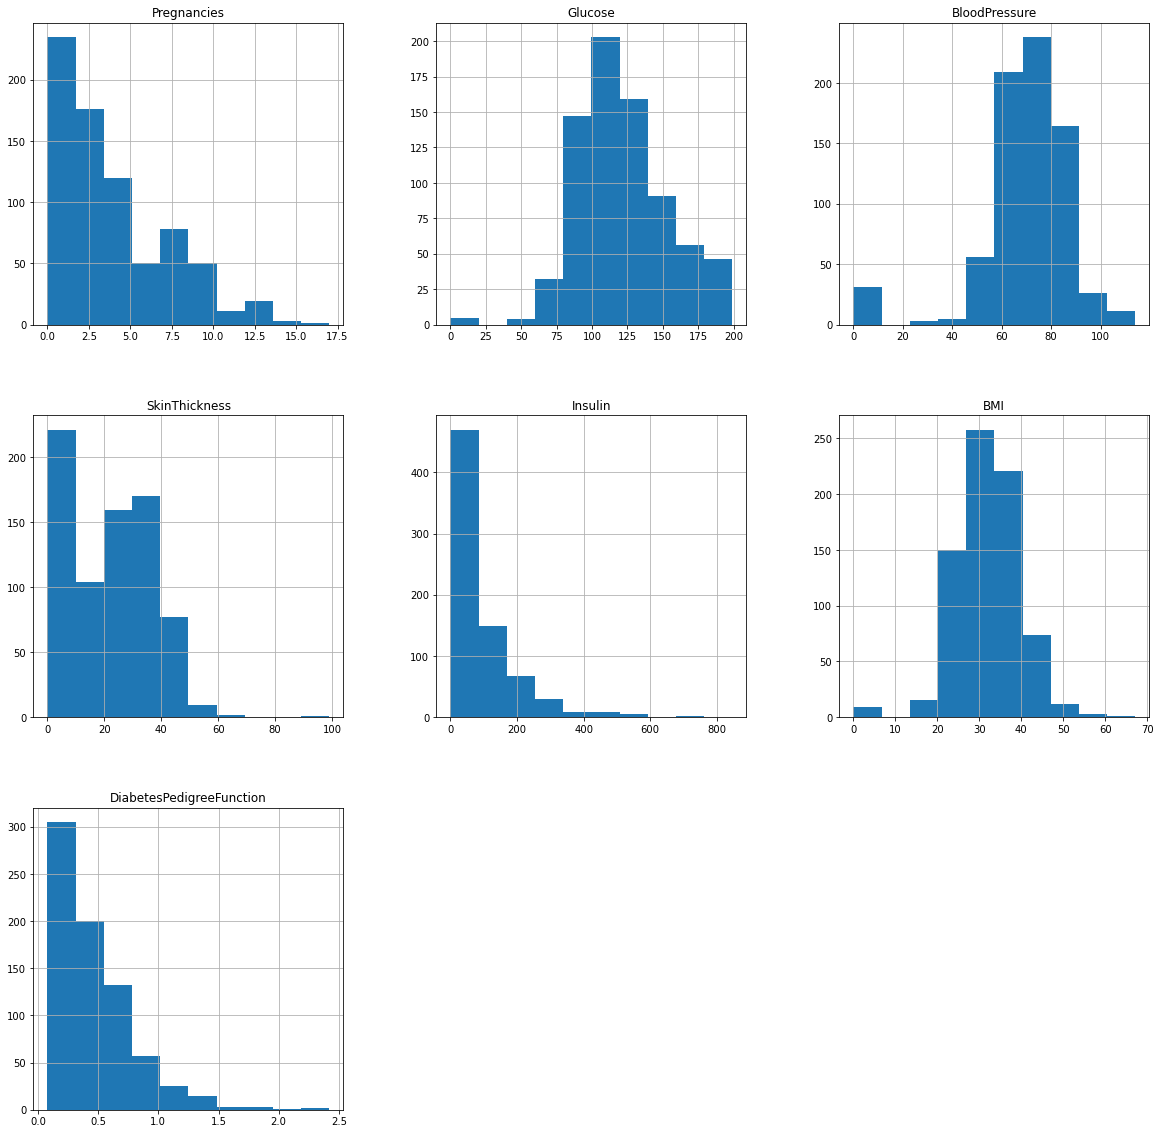

In [44]:
data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]].hist(figsize=(20,20))

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,roc_curve,plot_roc_curve,precision_score,recall_score,f1_score,matthews_corrcoef

In [46]:
model = GaussianNB()

In [47]:
X = data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]]
Y = data["Outcome"].values.reshape(-1,1);

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

(497, 7)
(246, 7)


In [50]:
model.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

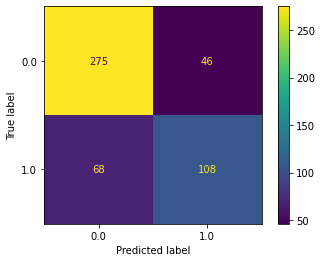

In [62]:
pred_train = model.predict(X_train)
cm = confusion_matrix(y_train, pred_train, labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [81]:
help(sklearn.metrics)

Help on package sklearn.metrics in sklearn:

NAME
    sklearn.metrics

DESCRIPTION
    The :mod:`sklearn.metrics` module includes score functions, performance metrics
    and pairwise metrics and distance computations.

PACKAGE CONTENTS
    _base
    _classification
    _dist_metrics
    _pairwise_fast
    _plot (package)
    _ranking
    _regression
    _scorer
    cluster (package)
    pairwise
    setup
    tests (package)

CLASSES
    builtins.object
        sklearn.metrics._dist_metrics.DistanceMetric
        sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay
        sklearn.metrics._plot.det_curve.DetCurveDisplay
        sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay
        sklearn.metrics._plot.roc_curve.RocCurveDisplay
    
    class ConfusionMatrixDisplay(builtins.object)
     |  ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)
     |  
     |  Confusion Matrix visualization.
     |  
     |  It is recommend to use
     |  :func

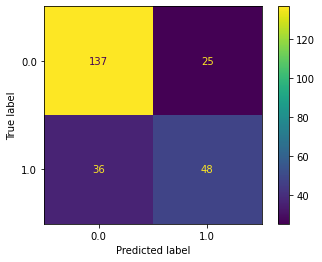

In [63]:
pred_test = model.predict(X_test)
cm = confusion_matrix(y_test, pred_test, labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [71]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       162
         1.0       0.66      0.57      0.61        84

    accuracy                           0.75       246
   macro avg       0.72      0.71      0.71       246
weighted avg       0.75      0.75      0.75       246



In [87]:
fpr, tpr, thresholds = roc_curve(y_test,pred_test)
print(fpr)
print(tpr)

[0.         0.15432099 1.        ]
[0.         0.57142857 1.        ]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


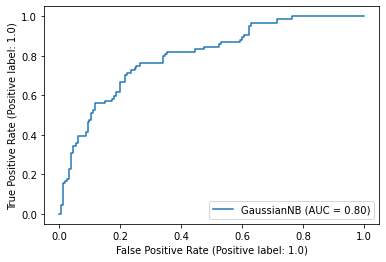

In [79]:
plot_roc_curve(model, X_test, y_test)

In [85]:
print(precision_score(y_test,pred_test))
print(recall_score(y_test,pred_test))
print(f1_score(y_test,pred_test))
print(matthews_corrcoef(y_test,pred_test))

0.6575342465753424
0.5714285714285714
0.6114649681528662
0.4329729402501804
